In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [3]:
deaths_after_tg = pd.array([1]*6062)
deaths_before_tg = pd.array([0]*(12000-6062))

deaths = np.concatenate((deaths_after_tg ,deaths_before_tg))
deaths_df = pd.DataFrame(deaths)

print(len(deaths_df))
print(deaths_df.value_counts(normalize=True))


12000
1    0.505167
0    0.494833
dtype: float64


In [4]:
#np.random.seed(41)


def CI_simulation(df, sample_size, alpha, tot_CI):

  intervals = []
  sample_means = []

  for sample in range(tot_CI):
    sample = np.random.choice(a= df, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

  # z-critical value 
    z_critical = stats.norm.ppf(q = 0.975)          

    pop_stdev = df.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

  return intervals, sample_means



Intervals without true mean:
             0        1
brown  0.12109  0.47891
brown  0.52109  0.87891
brown  0.52109  0.87891


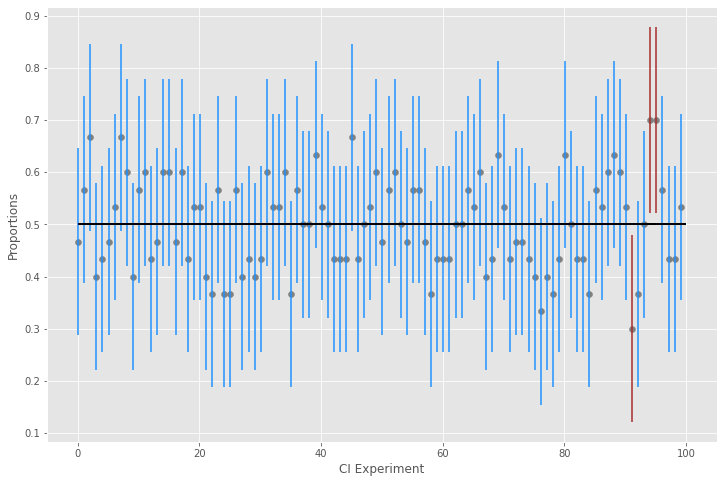

In [115]:
def print_CI_simulation(df, sample_size, alpha, tot_CI):
  #plt.style.use('ggplot')
  intervals, sample_means = CI_simulation(df, sample_size, alpha, tot_CI)
  df_mean = 0.5
  colors=["brown" if (bot > df_mean or top < df_mean) else "dodgerblue" for bot,top in intervals]
  x=np.arange(0.1, tot_CI, 1)
  yerr=[(top-bot)/2 for bot,top in intervals]

  df_test = pd.DataFrame(intervals,colors)
  print("Intervals without true mean:")
  print(df_test[df_test.index =="brown"])

  fig, ax = plt.subplots(figsize=(12,8))

  ax.scatter(x=x, 
             y=sample_means,
             color="grey")

  for pos, y, err, colors in zip(x,sample_means,yerr,colors):
    
    ax.errorbar(pos, y, yerr=err, color=colors)

  ax.hlines(xmin=0, xmax=100,
           y=0.5, 
           linewidth=2.0,
           color="black")
  
  ax.set_xlabel("CI Experiment")
  ax.set_ylabel("Proportions")

  plt.show()

print_CI_simulation(deaths, 30, 0.05, 100)

Intervals without true mean:
             0        1
brown  0.12109  0.47891
brown  0.52109  0.87891
brown  0.12109  0.47891
brown  0.12109  0.47891
brown  0.52109  0.87891


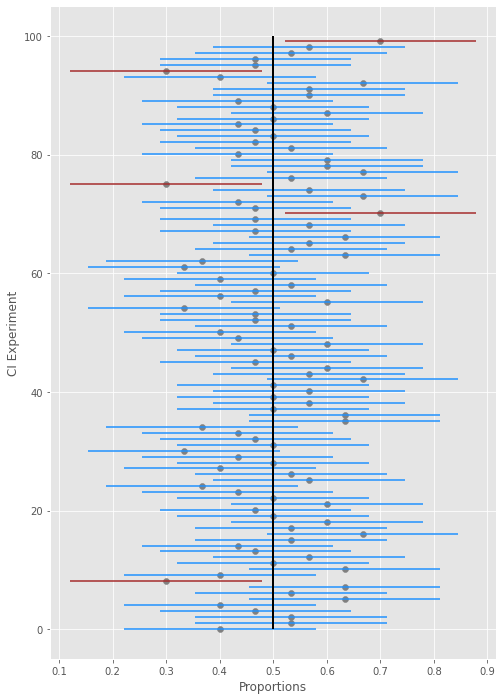

In [101]:
def print_CI_simulation(df, sample_size, alpha, tot_CI):
  #plt.style.use('ggplot')
  intervals, sample_means = CI_simulation(df, sample_size, alpha, tot_CI)
  df_mean = 0.5
  colors=["brown" if (bot > df_mean or top < df_mean) else "dodgerblue" for bot,top in intervals]
  x=np.arange(0.1, tot_CI, 1)
  yerr=[(top-bot)/2 for bot,top in intervals]

  df_test = pd.DataFrame(intervals,colors)
  print("Intervals without true mean:")
  print(df_test[df_test.index =="brown"])

  fig, ax = plt.subplots(figsize=(8,12))

  ax.scatter(x=sample_means, 
             y=x,
             color="grey")

  for pos, y, err, colors in zip(sample_means,x,yerr,colors):
    
    ax.errorbar(pos, y, xerr=err, color=colors)

  ax.vlines(ymin=0, ymax=100,
           x=0.5, 
           linewidth=2.0,
           color="black")
  
  ax.set_xlabel("Proportions")
  ax.set_ylabel("CI Experiment")

  plt.show()

print_CI_simulation(deaths, 30, 0.05, 100)